# Lab 2 : Aproximación de raises

 Defino función para mostrar resultados:

In [131]:
def showMagicalResults(hx,hf,printLists = False):
    if printLists:
        print('x --> ',format(hx))
        print('f(x) --> ',format(hf))
    print('Iterations --> ',format(hx.__len__()))
    print('Final values --> x -->',format(hx[-1]),' f(x) --> ',format(hf[-1]))    

## 1) Bisección

In [132]:
def rbisec(fun, I, err, mit):
    a ,b= I[0], I[1]
    hx,hf = [],[]
    for i in range(mit):
        c = (a+b)/2
        hx.append(c)
        hf.append(fun(c))
        if abs(fun(c)) < err:
            break
            
        if fun(a)*fun(c) < 0:
            b = c
        elif fun(a)*fun(c) > 0:
            a = c
        elif fun(a)*fun(b) > 0:
            break
            


    return hx,hf          

hx, hf = rbisec(lambda x: x**2 - 4, [-100, 100], 0.01, 25)

showMagicalResults(hx,hf)

Iterations -->  12
Final values --> x --> -2.001953125  f(x) -->  0.007816314697265625


# 2) a)

In [133]:
import  math
fun_lab2ej2a = lambda x: math.tan(x) / 2*x
hx, hf = rbisec(fun_lab2ej2a, [0.8, 1.4], 1e-5, 100)
showMagicalResults(hx,hf)

Iterations -->  100
Final values --> x --> 1.4  f(x) -->  4.0585186008380205


# 2) b)

In [134]:
fun_lab2ej2b = lambda x: pow(x, 2) - 3
hx, hf = rbisec(fun_lab2ej2b, [0, 3], pow(10, -5), 20)
showMagicalResults(hx,hf)
print('Raiz real -->',format(math.sqrt(3)))

Iterations -->  18
Final values --> x --> 1.7320518493652344  f(x) -->  3.6088895285502076e-06
Raiz real --> 1.7320508075688772


# 2) c) Graficando


In [135]:

# function to plot
def plot_bisec(fun, I, err, mit, figsize=5):
    """
    Given a function, a list of intervals,
    an error and the max iterations allowed,
    for each interval given plots the
    real values of the function in the interval
    plots the used values by the bisection method
    to find the function's zero.
    Creates N plots where N is the amount of intervals.
    """

    # create the samples
    I_x = [np.linspace(*i, 1000) for i in I]
    
    # get the real values
    I_r = [np.array([
        fun(x) 
        for x in I_s
    ]) for I_s in I_x]
    
    # get our own results using bisec
    I_b = [
        rbisec(fun, i, err, mit)
        for i in I
    ]
    
    # create the fig and axes
    fig, ax = plt.subplots(1, len(I), figsize=(figsize*len(I), figsize))
    
    # for each ax
    for i, (ii, x, r, (hx, hf)) in enumerate(zip(I, I_x, I_r, I_b)):
        ax[i].set_title('I'+str(i)+':' + str(ii) )
        
        # show the real results
        ax[i].plot(x, r, label='f(x)')
        
        # show the results using bisec
        bis_failed = not any(abs(f_x) < abs(err) for f_x in hf)
        # check if the bisc failed (not close enough to zero)
        if bis_failed:
            centerx = sum(ii)/2
            centery = ax[i].get_yticks()[3]
            ax[i].text(centerx, centery, 'BISEC FAILED',
                       horizontalalignment='center',
                       verticalalignment='center',
                       color='red')
        else:
            # bisec didn't failed, show results
            ax[i].scatter(hx, hf, label='bisec(I)', color='green')
            # center the zero
            ax[i].spines['left'].set_position('center')
            ax[i].spines['bottom'].set_position('zero')
            # show zero in another color
            ax[i].scatter(hx[-1], hf[-1], label='zero', color='red')
        
        ax[i].spines['right'].set_color('none')
        ax[i].spines['top'].set_color('none')

        ax[i].legend()
    
    plt.show()




2)c) Gráfico de tan 2) a)

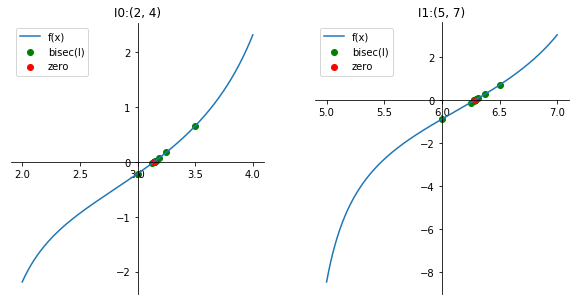

In [136]:
I_0 = (2, 4)
I_1 = (5, 7)

plot_bisec(fun_lab2ej2a, [I_0, I_1], pow(10, -5), 100)

2)c) Gráfico x²-3 del 2)b)

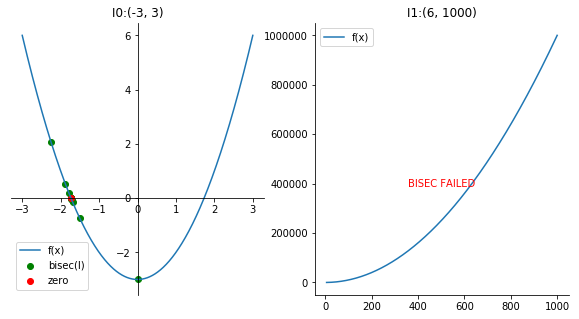

In [137]:
I_0 = (-3, 3)
I_1 = (6, 1000)

plot_bisec(fun_lab2ej2b, [I_0, I_1], pow(10, -5), 100)


## 3) Método de Newton

In [138]:
def rnewton(fun, x0, err, mit):
    hx,hf = [], []
    x_n = x0
    x_n_p = 0

    for k in range(mit):
        fx , fdx = fun(x_n)
        hx.append(x_n)
        hf.append(fx)
        if (abs(fx) < abs(err)):
            break
        abs_x_n = abs(x_n - x_n_p)
        if x_n != 0 and (abs_x_n / abs(x_n) < abs(err)):
            break
        if (fdx == 0):
            break
        x_n_p = x_n
        x_n = x_n - (fx/fdx)
    return hx,hf

Probemos con f(x) = x³

In [139]:
hx, hf = rnewton(lambda x: (pow(x, 3), 3*pow(x,2)), 3, pow(10, -20), 100)
showMagicalResults(hx, hf)

Iterations -->  42
Final values --> x --> 1.8087545367633247e-07  f(x) -->  5.9175086346392475e-21


## 4)

In [140]:
def unaFuncion(a):
    assert a > 0
    return rnewton(lambda x: (pow(x, 3)-a, 3*pow(x,2)),3,pow(10,-6),100)
hx, hf = unaFuncion(27)
showMagicalResults(hx, hf)

Iterations -->  1
Final values --> x --> 3  f(x) -->  0


## 5) Método de punto fijo

In [141]:
def ripf(fun, x0, err, mit):
    hx = []
    xn = x0
    for i in range(mit):
        p = fun(xn)
        hx.append(p)
        if abs(p - xn) < err:
            break
        x_k = p
    return hx

## 6) Aproximación con método de punto fijo

In [142]:
vals = [0.5, 1, 1.5, 2, 2.5]
for val in vals:
    try:
        pf = ripf(lambda x: pow(2, (x-1)),val,pow(10, -5),100)
    except OverflowError:
        print('Fixed point method failed with x0 = ',format(val))
        continue
    print('Fixed point method with x0 =',format(val),'converges to -->',format(pf[-1]),'Interations done -->',format(len(pf)))

Fixed point method with x0 = 0.5 converges to --> 0.7071067811865476 Interations done --> 100
Fixed point method with x0 = 1 converges to --> 1 Interations done --> 1
Fixed point method with x0 = 1.5 converges to --> 1.4142135623730951 Interations done --> 100
Fixed point method with x0 = 2 converges to --> 2 Interations done --> 1
Fixed point method with x0 = 2.5 converges to --> 2.8284271247461903 Interations done --> 100


## 7)


In [143]:
    def forBisec(x):
        def fun(y):
            return (y - np.exp(-pow((1 - x*y), 2)))
        return rbisec(fun,(0,1.5),pow(10,-12),123)
    
    print('Biseccion')
    hxb,hfb = forBisec(1)
    showMagicalResults(hxb,hfb)
    
    def forNewton(x):
        def fun(y):
            return (y - np.exp(-pow((1 - x*y), 2))),(1 - 2 * x * np.exp(- (x * y - 1) ** 2) * (1 - x * y))
        return rnewton(fun,1,pow(10,-12),123)
    
    print('Newton')
    hxn,hfn = forNewton(1)
    showMagicalResults(hxn,hfn)
    
    def forFixedPoint(x):
        def fun(y):
            return (y - np.exp(-pow((1 - x*y), 2)))
        def iterFun(y):
            return y - fun(y)
        return ripf(iterFun,x,pow(10,-12),123)
    
    pf = forFixedPoint(1)
    print('Fixed point method with x0 = 1 converges to -->',format(pf[-1]),'Interations done -->',format(len(pf)))

    print(hxb[-1],hxn[-1],pf[-1])

Biseccion
Iterations -->  39
Final values --> x --> 0.9999999999990905  f(x) -->  -9.094947017729282e-13
Newton
Iterations -->  1
Final values --> x --> 1  f(x) -->  0.0
Fixed point method with x0 = 1 converges to --> 1.0 Interations done --> 1
0.9999999999990905 1 1.0


Graficos:

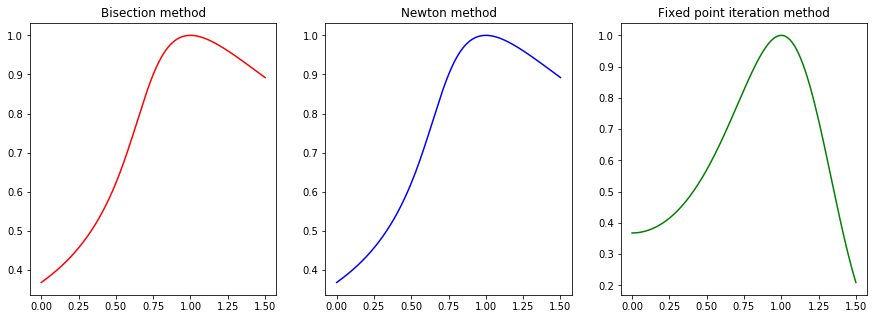

In [144]:
import numpy as np
import matplotlib.pyplot as plt

# x
I = (0, 1.5)
X = np.linspace(*I, 1000)

# imagenes
bisec = [forBisec(x)[0][-1] for x in X]
newton = [forNewton(x)[0][-1] for x in X]
ipf = [forFixedPoint(x)[-1] for x in X]

# mostramos los gráficos
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].plot(X, bisec, color='red')
ax[0].set_title('Bisection method')

ax[1].plot(X, newton, color='blue')
ax[1].set_title('Newton method')

ax[2].plot(X, ipf, color='green')
ax[2].set_title('Fixed point iteration method')

plt.show()
